In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py # 处理HDF5文件
import scipy # 科学计算工具
from PIL import Image # Python Image Library
from scipy import ndimage # 图像处理模块

In [2]:
# 读取数据

train_dataset = h5py.File("train_cat.h5", "r") 
test_dataset = h5py.File("test_cat.h5", "r")
    
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # 原始数据
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

print('train_set_x_orig:' + str(train_set_x_orig.shape))
print('train_set_y_orig:' + str(train_set_y_orig.shape))
print('test_set_x_orig:' + str(test_set_x_orig.shape))
print('test_set_y_orig:' + str(test_set_y_orig.shape))

train_set_x_orig:(209, 64, 64, 3)
train_set_y_orig:(209,)
test_set_x_orig:(50, 64, 64, 3)
test_set_y_orig:(50,)


y = 1


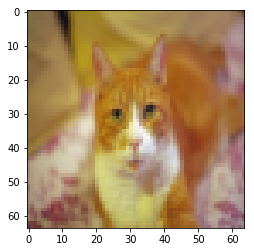

In [3]:
# 数据可视化

index = 24
plt.imshow(train_set_x_orig[index])
print('y = ' + str(train_set_y_orig[index]))

In [4]:
# 数据处理

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T # 重塑，一张图片用一个特征向量表示
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x = train_set_x_flatten / 255. #标准化
test_set_x = test_set_x_flatten / 255.

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) # 重塑
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

print('train_set_x:' + str(train_set_x.shape))
print('train_set_y:' + str(train_set_y.shape))
print('test_set_x:' + str(test_set_x.shape))
print('test_set_y:' + str(test_set_y.shape))

train_set_x:(12288, 209)
train_set_y:(1, 209)
test_set_x:(12288, 50)
test_set_y:(1, 50)


In [5]:
# 单次成本、梯度

def sigmoid(z):
    s = 1.0 / (1 + np.exp(-z))
    return s

def propagate(w, b, X, Y):
    m = X.shape[1] # 训练样本数量
    
    Y_hat = sigmoid(np.dot(w.T, X) + b) # 假设函数
    cost = -(np.dot(Y, np.log(Y_hat).T) + np.dot((1 - Y), np.log(1 - Y_hat).T)) / m # 成本函数
    
    dw = np.dot(X, (Y_hat - Y).T) / m # 求导
    db = np.sum(Y_hat - Y) / m
    
    cost = np.squeeze(cost) # 清除单维度
    grads = {'dw': dw, 'db': db}
    
    return cost, grads

In [17]:
# 梯度下降

def optimize(w, b, X, Y, num_iters, learning_rate, print_cost = False): 
    costs = [] # 记录成本 
    
    for i in range(num_iters):
        cost, grads = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print('梯度下降%i次后的成本为：%f' %(i, cost))
    
    params = {'w': w, 'b': b} # 求得的参数值
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

In [24]:
# 输出分类结果

def predict(w, b, X):
    m = X.shape[1]
    
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    Y_hat = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(Y_hat.shape[1]):
        if Y_hat[:, i] > 0.5:
            Y_prediction[:, i] = 1
        else:
            Y_prediction[:, i] = 0
            
    return Y_prediction

In [25]:
# 学习参数

w_init = np.zeros((train_set_x.shape[0], 1)) # 参数初始化
b_init = 0

num_iters = 2000 # 迭代次数
alpha = 0.005 # 学习率

params, grads, costs = optimize(w_init, b_init, train_set_x, train_set_y, num_iters, alpha, True)
w = params['w']
b = params['b']
print('\nw = ' + str(w))
print('b = ' + str(b))

梯度下降0次后的成本为：0.693147
梯度下降100次后的成本为：0.584508
梯度下降200次后的成本为：0.466949
梯度下降300次后的成本为：0.376007
梯度下降400次后的成本为：0.331463
梯度下降500次后的成本为：0.303273
梯度下降600次后的成本为：0.279880
梯度下降700次后的成本为：0.260042
梯度下降800次后的成本为：0.242941
梯度下降900次后的成本为：0.228004
梯度下降1000次后的成本为：0.214820
梯度下降1100次后的成本为：0.203078
梯度下降1200次后的成本为：0.192544
梯度下降1300次后的成本为：0.183033
梯度下降1400次后的成本为：0.174399
梯度下降1500次后的成本为：0.166521
梯度下降1600次后的成本为：0.159305
梯度下降1700次后的成本为：0.152667
梯度下降1800次后的成本为：0.146542
梯度下降1900次后的成本为：0.140872

w = [[ 0.00961402]
 [-0.0264683 ]
 [-0.01226513]
 ...
 [-0.01144453]
 [-0.02944783]
 [ 0.02378106]]
b = -0.015906243999692996


In [26]:
# 识别准确度

Y_predict_train = predict(w, b, train_set_x) #训练集预测结果
Y_predict_test = predict(w, b, test_set_x) #测试集

train_accuracy = 100 - np.mean(np.abs(Y_predict_train - train_set_y)) * 100 # 训练集识别准确度
test_accuracy = 100 - np.mean(np.abs(Y_predict_test - test_set_y)) * 100 # 测试集
print("训练集识别准确度: {} %".format(train_accuracy))
print("测试集识别准确度: {} %".format(test_accuracy))

训练集识别准确度: 99.04306220095694 %
测试集识别准确度: 70.0 %


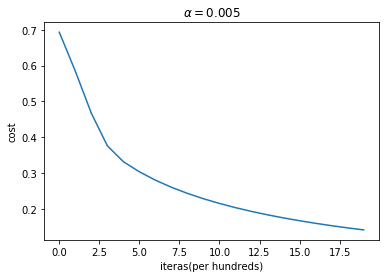

In [28]:
# 学习曲线

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iteras(per hundreds)')
plt.title(r'$\alpha = $' + str(alpha))
plt.show()

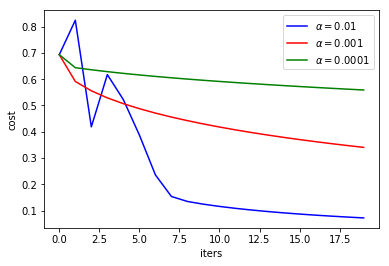

In [30]:
# 学习率对比

alpha_1 = 0.01 
_, _, costs_1 = optimize(w_init, b_init, train_set_x, train_set_y, num_iters, alpha_1, False)
plt.plot(range(len(costs_1)), costs_1, c = 'b', label = r'$\alpha=0.01$');
plt.ylabel('cost')
plt.xlabel('iters')

alpha_2 = 0.001
_, _, costs_2 = optimize(w_init, b_init, train_set_x, train_set_y, num_iters, alpha_2, False)
plt.plot(range(len(costs_2)), costs_2, c = 'r', label = r'$\alpha=0.001$');

alpha_3 = 0.0001
_, _, costs_3 = optimize(w_init, b_init, train_set_x, train_set_y, num_iters, alpha_3, False)
plt.plot(range(len(costs_3)), costs_3, c = 'g', label = r'$\alpha=0.0001$');
plt.legend()